In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

import mplfinance as fplt

import plotly.graph_objects as go

from finlib.tick_data import read_csv
from finlib.bars import time_bars, tick_bars, volume_bars, dollar_bars

In [12]:
tick_data = read_csv('../data/test/binance_ticks.csv')
tick_data.head()

,trade_id,price,qty,quoteQty,time,isBuyerMaker,isBestMatch
0,222472783,7195.24,0.001500,10.792860,1577836800594,True,True
1,222472784,7196.25,0.022706,163.398053,1577836800862,False,True
2,222472785,7196.25,0.099650,717.106312,1577836800862,False,True
3,222472786,7196.25,0.001543,11.103814,1577836800998,False,True
4,222472787,7195.25,0.400000,2878.100000,1577836801503,True,True


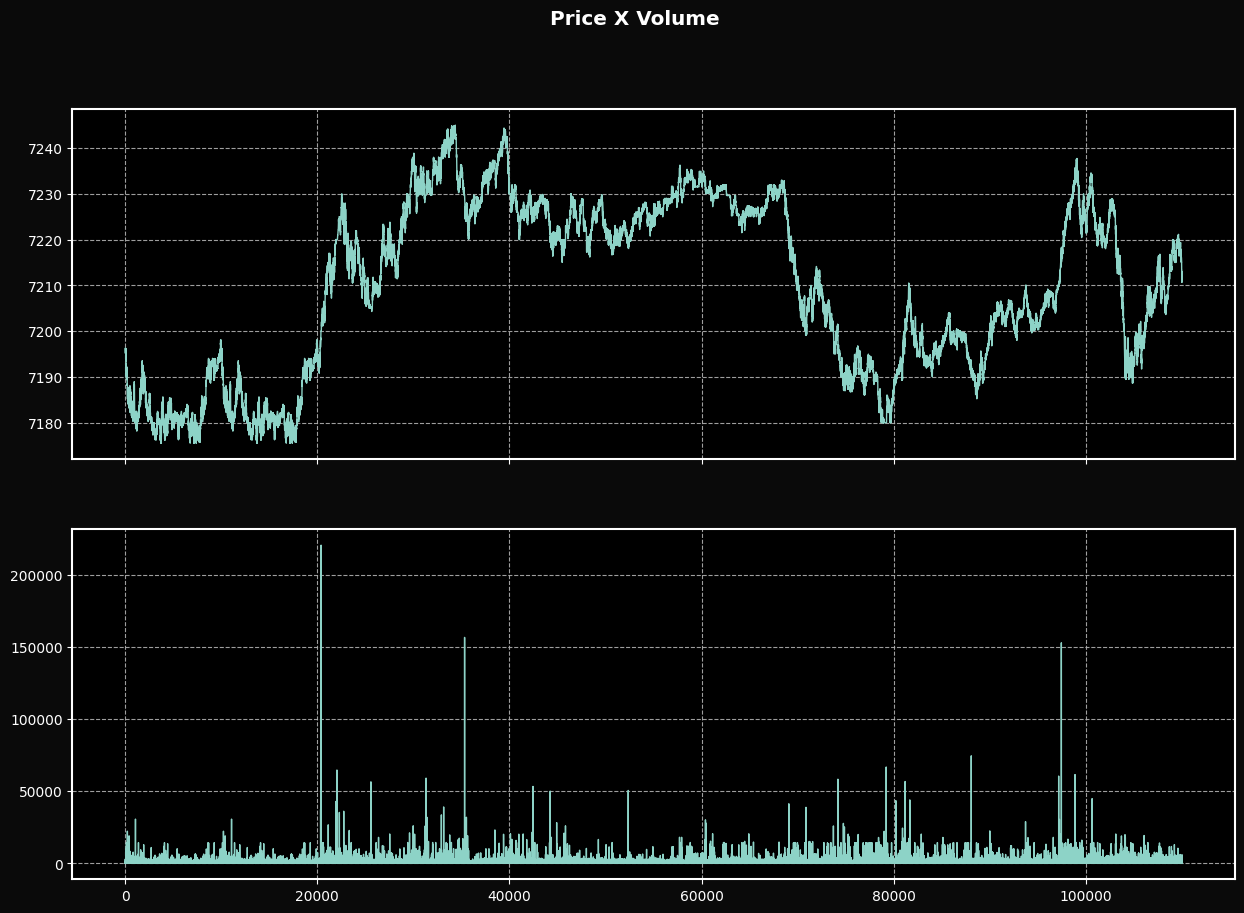

In [43]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(15, 10))
fig.suptitle('Price X Volume')
ax1.plot(tick_data['price'])
ax2.plot(tick_data['quoteQty'])
plt.show()

In [34]:
time_bars_ = time_bars(tick_data, '3T')

time_bars_

,time,open,close,high,low,volume_contracts,volume_dollars,buyer_maker_pct,best_match_pct
0,2020-01-01 00:00:00.594,7195.24,7182.43,7196.25,7180.26,141.145274,1.014435e+06,0.518072,1.0
1,2020-01-01 00:03:02.814,7183.83,7179.99,7188.94,7178.20,74.799478,5.371682e+05,0.540909,1.0
2,2020-01-01 00:06:00.448,7180.00,7187.68,7187.74,7179.99,61.773998,4.437383e+05,0.430595,1.0
3,2020-01-01 00:09:00.351,7187.68,7188.71,7193.53,7186.02,77.761756,5.590699e+05,0.395735,1.0
4,2020-01-01 00:12:00.386,7189.52,7180.97,7189.52,7180.24,50.405230,3.620786e+05,0.570025,1.0
...,...,...,...,...,...,...,...,...,...
245,2020-01-01 12:15:00.639,7205.08,7210.62,7211.72,7203.62,23.137066,1.667575e+05,0.310096,1.0
246,2020-01-01 12:18:01.563,7210.62,7219.05,7220.00,7210.62,38.473000,2.775691e+05,0.440000,1.0
247,2020-01-01 12:21:00.420,7219.71,7219.10,7219.99,7215.00,30.988650,2.236386e+05,0.583333,1.0
248,2020-01-01 12:24:01.310,7218.47,7217.94,7221.14,7216.44,33.884035,2.446080e+05,0.466334,1.0


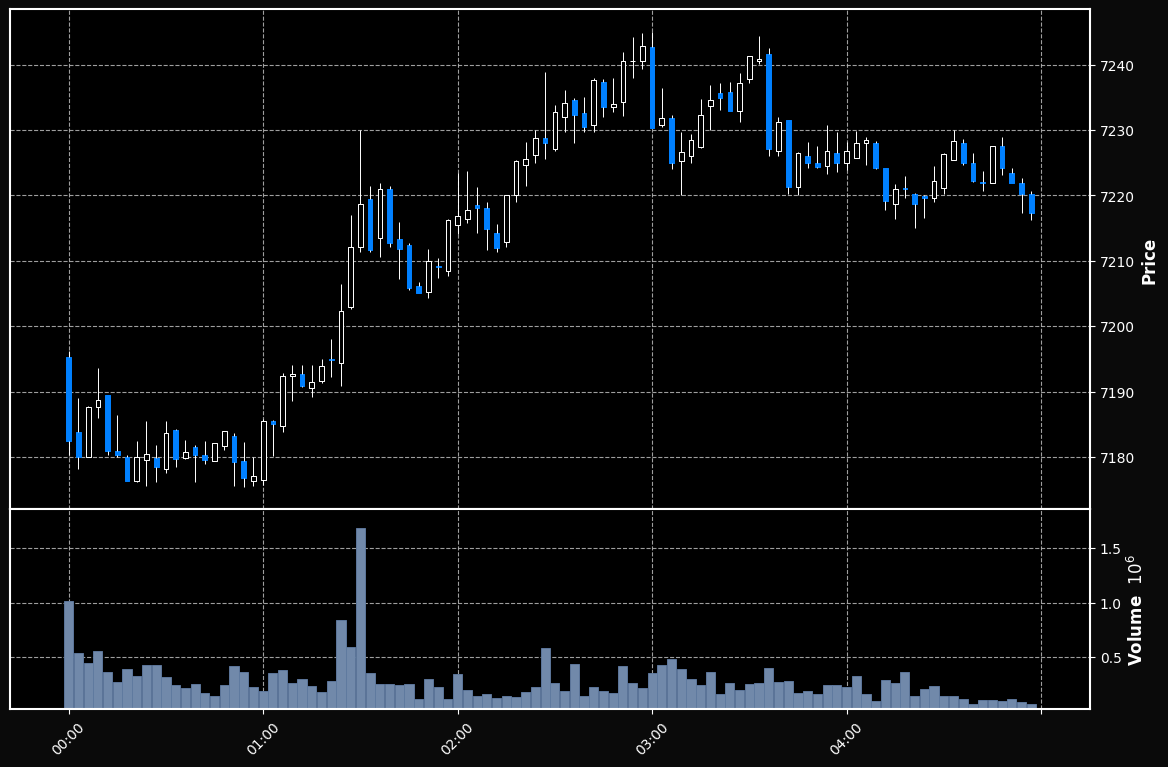

In [39]:
fplt.plot(
    time_bars_[:100].fillna(method='ffill').set_index('time').rename(columns={'volume_dollars': 'volume'}), 
    figsize=(15, 10),
    style='mike',
    type='candle',
    volume=True
)

In [40]:
tick_bars_ = tick_bars(tick_data, n=100)

tick_bars_

,time,open,close,high,low,volume_contracts,volume_dollars,buyer_maker_pct,best_match_pct
0,2020-01-01 00:00:00.594,7195.24,7192.04,7196.25,7191.95,7.193259,51750.941188,0.46,1.0
1,2020-01-01 00:00:12.108,7191.54,7190.54,7192.40,7189.39,14.635489,105236.791239,0.51,1.0
2,2020-01-01 00:00:28.805,7190.09,7187.69,7190.65,7184.07,10.716577,77029.610910,0.56,1.0
3,2020-01-01 00:00:36.417,7187.69,7184.81,7187.69,7184.25,7.165751,51491.414678,0.73,1.0
4,2020-01-01 00:00:48.458,7184.81,7186.60,7188.06,7183.14,12.744521,91566.181196,0.57,1.0
...,...,...,...,...,...,...,...,...,...
1095,2020-01-01 12:24:34.764,7219.57,7219.99,7220.90,7218.87,6.632240,47886.193269,0.33,1.0
1096,2020-01-01 12:25:00.202,7221.00,7216.44,7221.14,7216.44,8.438759,60926.721225,0.64,1.0
1097,2020-01-01 12:25:48.356,7216.44,7218.68,7218.85,7216.44,9.412477,67935.292347,0.52,1.0
1098,2020-01-01 12:26:43.478,7219.03,7216.17,7219.37,7215.35,7.028443,50731.655539,0.56,1.0


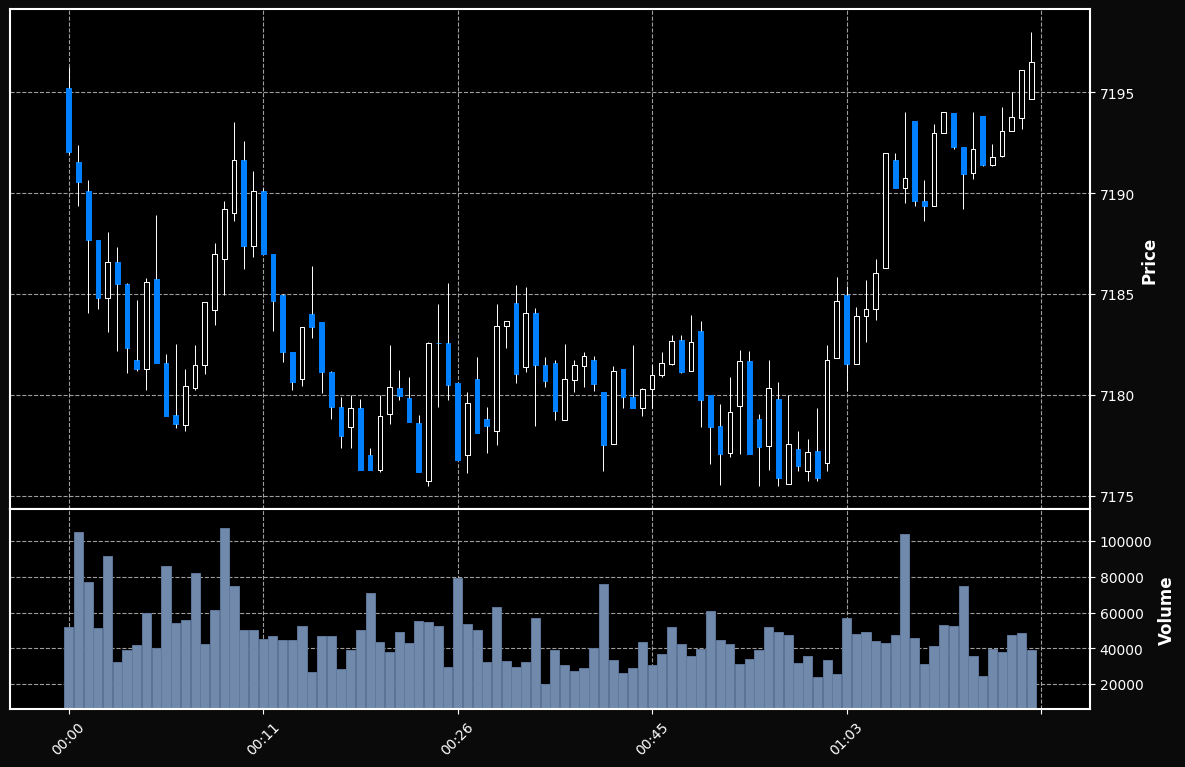

In [44]:
fplt.plot(
    tick_bars_[:100].fillna(method='ffill').set_index('time').rename(columns={'volume_dollars': 'volume'}), 
    figsize=(15, 10),
    style='mike',
    type='candle',
    volume=True
)

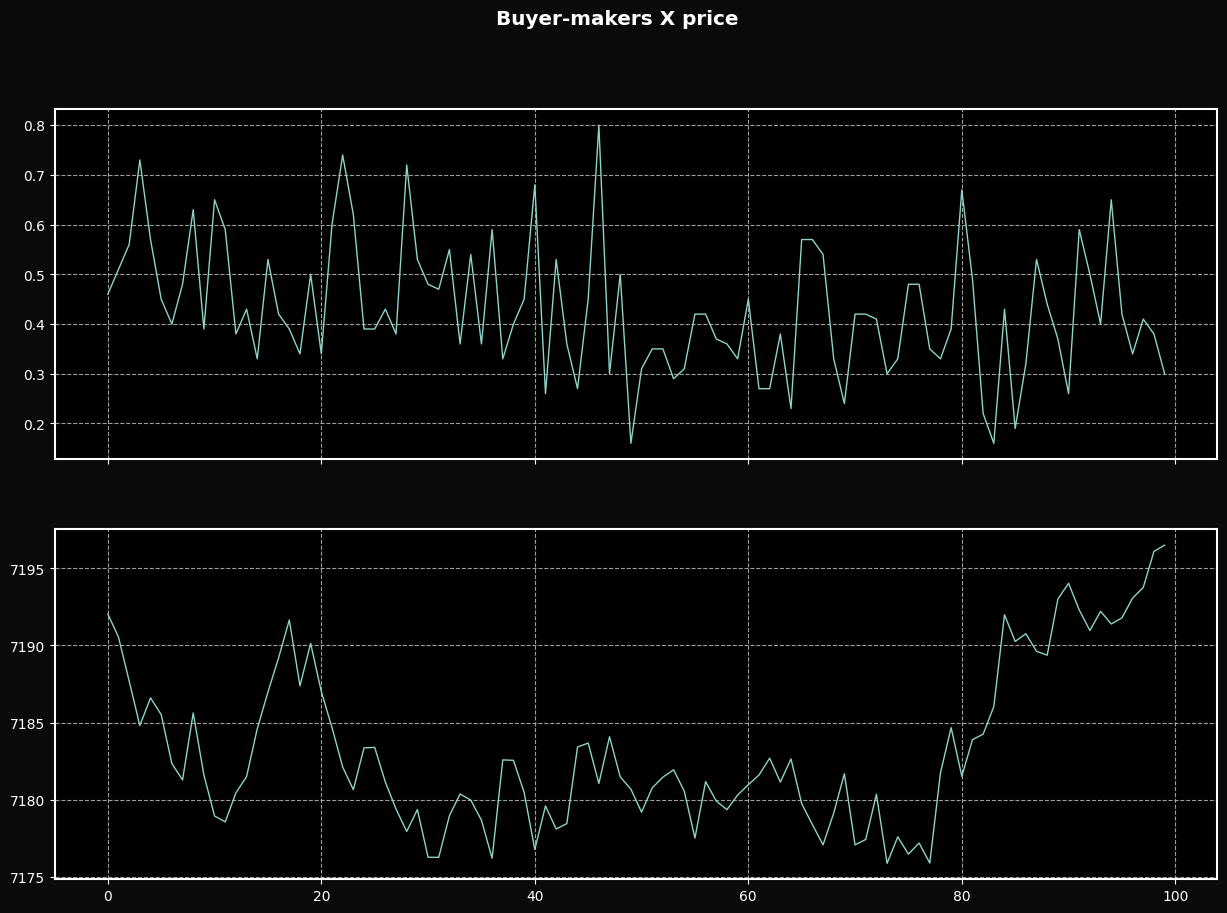

In [42]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(15, 10))
fig.suptitle('Buyer-makers X price')
ax1.plot(tick_bars_['buyer_maker_pct'][:100])
ax2.plot(tick_bars_['close'][:100])
plt.show()

In [46]:
volume_bars_ = volume_bars(tick_data)
volume_bars_

,time,open,close,high,low,volume_contracts,volume_dollars,buyer_maker_pct,best_match_pct
0,2020-01-01 00:00:00.594,7195.24,7190.35,7196.25,7190.30,9.286143,66800.380408,0.512000,1.0
1,2020-01-01 00:00:14.956,7190.33,7190.66,7192.12,7189.39,11.813793,84946.733893,0.463768,1.0
2,2020-01-01 00:00:24.943,7190.65,7187.46,7190.65,7184.07,10.397827,74741.259563,0.606742,1.0
3,2020-01-01 00:00:34.228,7187.45,7183.74,7187.69,7183.74,8.957462,64366.345967,0.669355,1.0
4,2020-01-01 00:00:49.248,7183.73,7184.95,7188.06,7182.20,12.577925,90369.304738,0.539823,1.0
...,...,...,...,...,...,...,...,...,...
869,2020-01-01 12:23:24.178,7216.13,7219.85,7220.00,7215.24,9.899488,71451.631980,0.408696,1.0
870,2020-01-01 12:24:24.742,7219.04,7221.00,7221.01,7218.17,10.314400,74470.861823,0.418301,1.0
871,2020-01-01 12:25:14.409,7221.01,7217.48,7221.14,7216.44,10.355450,74753.098817,0.571429,1.0
872,2020-01-01 12:26:14.534,7217.45,7219.36,7219.37,7216.59,10.195061,73589.109967,0.542056,1.0


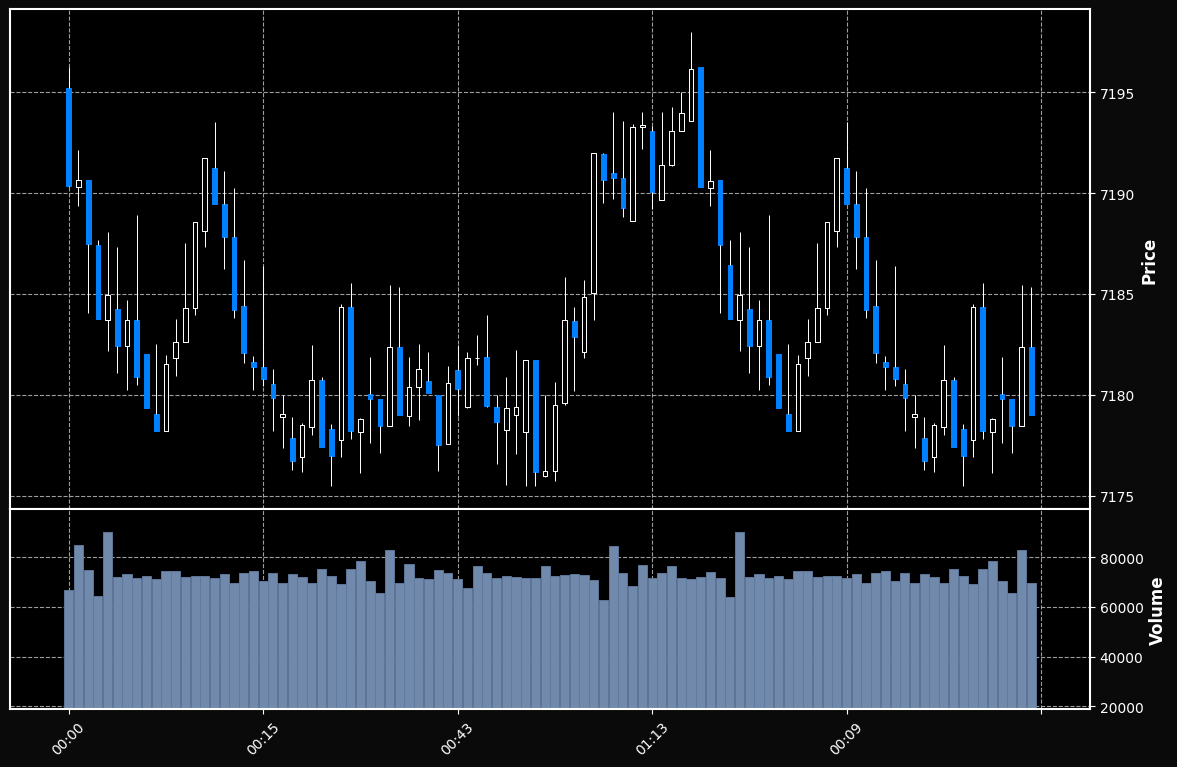

In [47]:
fplt.plot(
    volume_bars_[:100].fillna(method='ffill').set_index('time').rename(columns={'volume_dollars': 'volume'}), 
    figsize=(15, 10),
    style='mike',
    type='candle',
    volume=True
)

In [54]:
dollar_bars_ = dollar_bars(tick_data, dollars=10**6)
dollar_bars_

,time,open,close,high,low,volume_contracts,volume_dollars,buyer_maker_pct,best_match_pct
0,2020-01-01 00:00:00.594,7195.24,7187.68,7196.25,7178.20,138.861360,9.976849e+05,0.505542,1.0
1,2020-01-01 00:09:02.823,7187.70,7176.41,7193.53,7176.20,140.071849,1.006118e+06,0.477306,1.0
2,2020-01-01 00:24:40.699,7176.20,7180.88,7185.56,7175.47,139.497781,1.001606e+06,0.400502,1.0
3,2020-01-01 00:46:04.110,7180.41,7191.47,7191.48,7175.46,139.445671,1.001308e+06,0.383788,1.0
4,2020-01-01 00:00:00.594,7191.47,7185.51,7198.00,7184.07,139.273255,1.001608e+06,0.438830,1.0
...,...,...,...,...,...,...,...,...,...
61,2020-01-01 11:50:10.010,7207.35,7194.20,7211.53,7189.43,139.126699,1.001081e+06,0.574168,1.0
62,2020-01-01 11:51:48.250,7194.14,7202.05,7203.07,7188.61,139.248999,1.002096e+06,0.418279,1.0
63,2020-01-01 12:01:53.117,7202.48,7211.87,7216.76,7202.08,137.602433,9.919652e+05,0.461279,1.0
64,2020-01-01 12:10:43.051,7211.87,7219.01,7220.00,7203.62,140.130845,1.010653e+06,0.458137,1.0


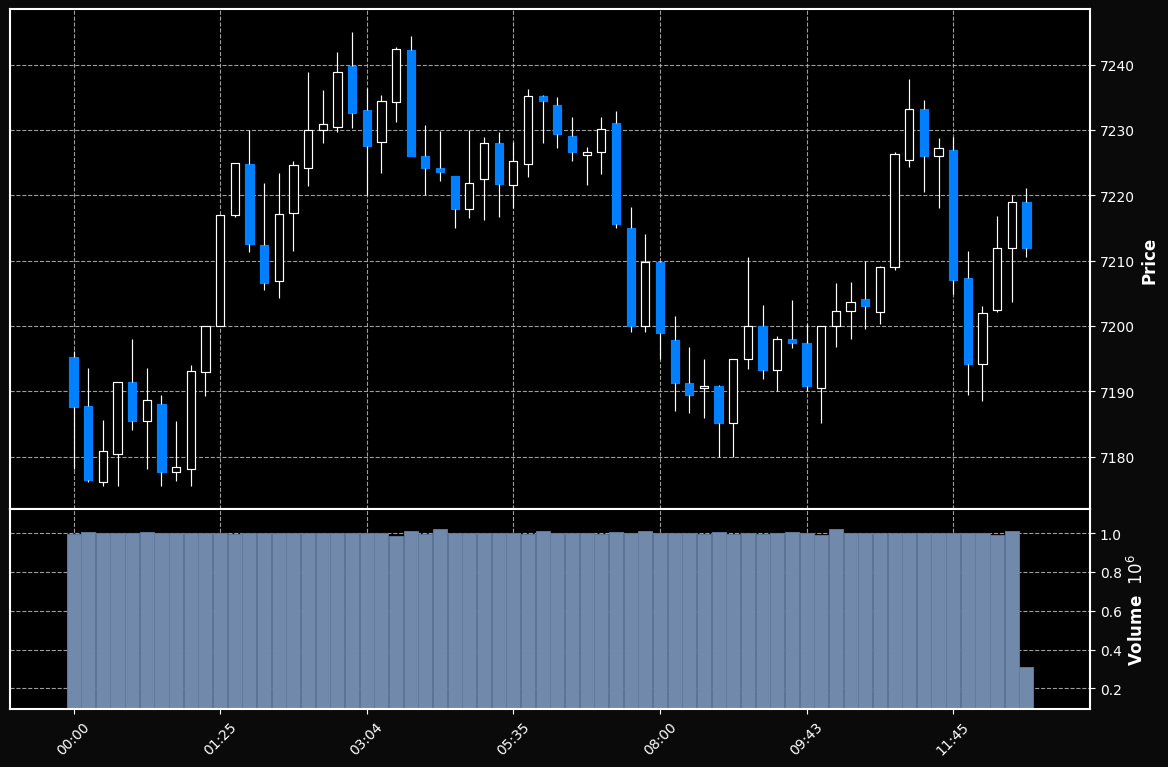

In [55]:
fplt.plot(
    dollar_bars_.fillna(method='ffill').set_index('time').rename(columns={'volume_dollars': 'volume'}), 
    figsize=(15, 10),
    style='mike',
    type='candle',
    volume=True
)

In [42]:
tick_data

,trade_id,price,qty,quoteQty,time,isBuyerMaker,isBestMatch
0,222472783,7195.24,0.001500,10.792860,1577836800594,True,True
1,222472784,7196.25,0.022706,163.398053,1577836800862,False,True
2,222472785,7196.25,0.099650,717.106312,1577836800862,False,True
3,222472786,7196.25,0.001543,11.103814,1577836800998,False,True
4,222472787,7195.25,0.400000,2878.100000,1577836801503,True,True
...,...,...,...,...,...,...,...
109995,222572778,7211.97,0.831317,5995.433264,1577881706744,False,True
109996,222572779,7212.04,0.135730,978.890189,1577881706744,False,True
109997,222572780,7212.16,0.032953,237.662308,1577881706744,False,True
109998,222572781,7212.12,0.001535,11.070604,1577881706841,False,True


In [44]:
import numpy as np

In [ ]:
np.sign()

In [66]:
tick_data[['price', 'qty']].diff()

def tick_rule(ticks):
    price_diffs = ticks.price.diff().fillna(0)
    
    b_seq = np.ones_like(price_diffs)
    
    for index in range(1, len(price_diffs)):
        if price_diffs[index] == 0:
            b_seq[index] = b_seq[index - 1]
        else:
            b_seq[index] = np.sign(price_diffs[index])
    
    return b_seq

b_seq = tick_rule(tick_data)

b_seq.cumsum()

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 2.586e+03, 2.585e+03,
       2.584e+03])